In [649]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [650]:
# Load data
train_data = pd.read_csv('./train.csv')
test_data  = pd.read_csv('./test.csv')

train_data_without_target = train_data.drop('Survived', axis=1)
target = train_data['Survived']

lastRow = len(train_data)

df = pd.concat([train_data_without_target, test_data], axis=0, sort=False)

Ok. Vamos dar uma olhada na página do desafio e ver o que eles falam sobre os dados por lá.

<img src="images/01.png" width="800"/>

In [651]:
# Visualizar as primeiras linhas do conjunto de treinamento
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [652]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [653]:
dummy_embarked = pd.get_dummies(df['Embarked'], 'Emb')
df = pd.concat([df, dummy_embarked], axis=1)
df = df.drop(['Embarked'], axis=1)

In [654]:
# Dividindo a coluna 'Nome' para extrair 'Sobrenome' e 'Título'
df['Surname'] = df['Name'].str.split(',').str[0]
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

# Descartando a coluna original 'Nome'
df = df.drop('Name', axis=1)

df.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Emb_C,Emb_Q,Emb_S,Surname,Title
0,1,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,Braund,Mr
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,Cumings,Mrs
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Heikkinen,Miss
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,Futrelle,Mrs
4,5,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1,Allen,Mr


In [655]:
df['Surname'].value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: Surname, Length: 875, dtype: int64

In [656]:
df.drop('Surname', axis=1, inplace=True)

In [657]:
# Contagem de valores únicos na coluna 'Title'
title_counts = df['Title'].value_counts()

print(title_counts)

# Definindo um limite para o número de títulos
threshold = 30

# Aplicando a função lambda para substituir títulos com contagem menor que o limite por 'Others'
df['Title'] = df['Title'].apply(lambda x: x if title_counts[x] >= threshold else 'Others')

print("--------------------")
# Verificando o resultado
print(df['Title'].value_counts())


Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64
--------------------
Mr        757
Miss      260
Mrs       197
Master     61
Others     34
Name: Title, dtype: int64


In [658]:
df.drop('Cabin', axis=1, inplace=True)

In [659]:
dummy_title = pd.get_dummies(df['Title'])
df = pd.concat([df, dummy_title], axis=1)
df = df.drop('Title', axis=1)

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Emb_C        1309 non-null   uint8  
 9   Emb_Q        1309 non-null   uint8  
 10  Emb_S        1309 non-null   uint8  
 11  Master       1309 non-null   uint8  
 12  Miss         1309 non-null   uint8  
 13  Mr           1309 non-null   uint8  
 14  Mrs          1309 non-null   uint8  
 15  Others       1309 non-null   uint8  
dtypes: float64(2), int64(5), object(1), uint8(8)
memory usage: 102.3+ KB


In [661]:
df.drop('Ticket', axis=1, inplace=True)

In [662]:
df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Master,Miss,Mr,Mrs,Others
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.355997,29.881138,0.498854,0.385027,33.295479,0.206264,0.093965,0.698243,0.046600,0.198625,0.578304,0.150497,0.025974
std,378.020061,0.837836,0.478997,14.413493,1.041658,0.865560,51.758668,0.404777,0.291891,0.459196,0.210862,0.399117,0.494019,0.357694,0.159119
min,1.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [663]:
# Verificar se há unicidade
print("IDs únicos:", df['PassengerId'].nunique() == len(df))


IDs únicos: True


In [664]:
# sns.pairplot(train_data)

<Axes: >

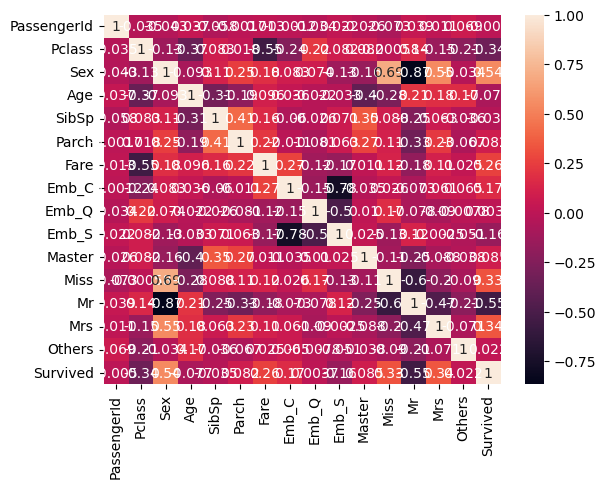

In [665]:
temp = pd.concat([df[0:lastRow], target], axis=1)
sns.heatmap(temp.corr(), annot=True)

<Axes: >

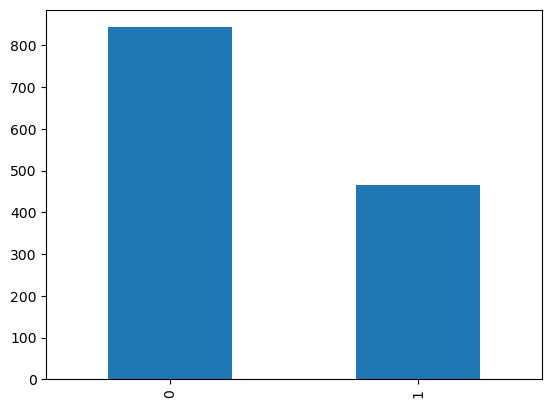

In [666]:
df['Sex'].value_counts().plot.bar()

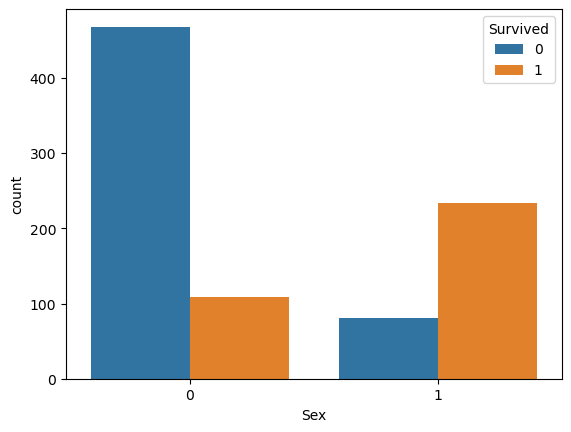

In [667]:
# Analisar mortes por gênero
sns.countplot(x='Sex', hue='Survived', data=temp)
plt.show()

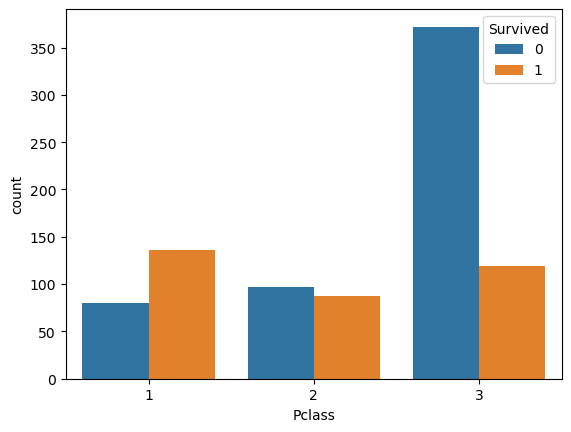

In [668]:
# Analisar mortes por classe
sns.countplot(x='Pclass', hue='Survived', data=temp)
plt.show()

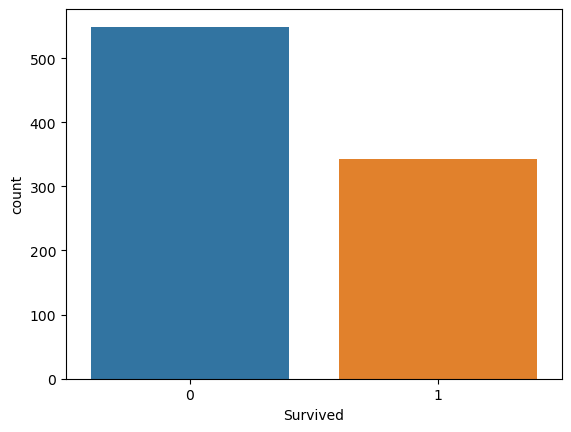

In [669]:
# Visualizações
sns.countplot(x='Survived', data=temp)
plt.show()

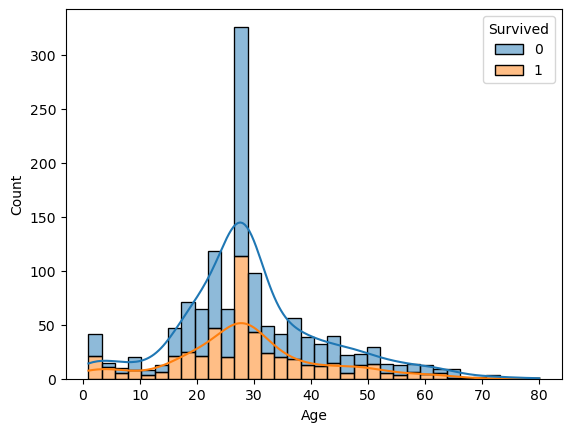

In [670]:
# Preencher valores NaN com a mediana da coluna 'Age'
df['Age'].fillna(df['Age'].median(), inplace=True)

# Aplicar a função ceil e converter para inteiros
df['Age'] = df['Age'].apply(np.ceil).astype(int)

# Plotar o histograma
temp = pd.concat([df, target], axis=1)
sns.histplot(x='Age', hue='Survived', multiple="stack", data=temp, kde=True)
plt.show()



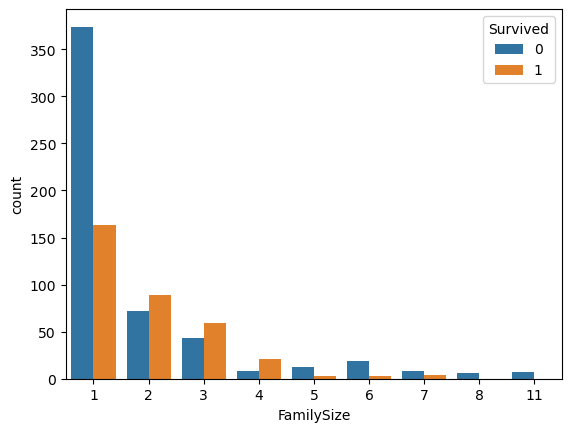

In [671]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.countplot(x='FamilySize', hue='Survived', data=train_data)
plt.show()


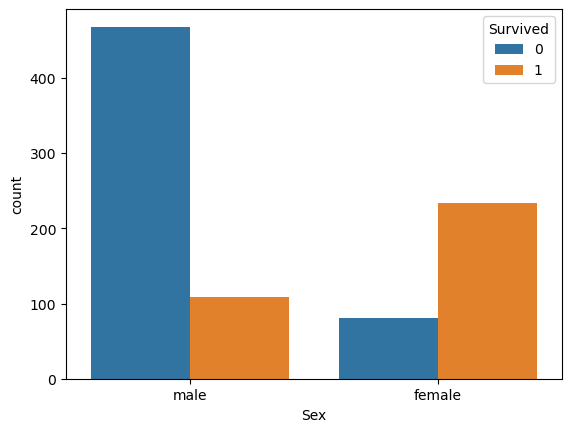

In [672]:
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()
df['Sex'] = df['Sex'].astype('category').cat.codes


In [673]:
# Verificar valores nulos
df.isnull().sum()
df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Emb_C          0
Emb_Q          0
Emb_S          0
Master         0
Miss           0
Mr             0
Mrs            0
Others         0
FamilySize     0
dtype: int64

In [674]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df = df.dropna()


# Training

In [675]:
X = df[0:lastRow].drop(['PassengerId'], axis=1)
y = train_data['Survived']

In [676]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [677]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
}

# Treinar e avaliar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    print(f'{name}: {accuracy}')


/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.8100558659217877
Decision Tree: 0.770949720670391


Random Forest: 0.8268156424581006
Gradient Boosting: 0.8379888268156425
Support Vector Classifier: 0.664804469273743


In [678]:
assert set(X_train.columns) == set(df[lastRow:].drop(['PassengerId'], axis=1).columns), "Columns do not match!"

In [679]:
# Escolha o melhor modelo
best_model = models['Logistic Regression']

# Fazer previsões no conjunto de teste
test_predictions = best_model.predict(df[lastRow:].drop(['PassengerId'], axis=1))

# Preparar arquivo de submissão
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)


